In [1]:
- 1/4 * np.log2(1/2) - 1/4 * np.log2(1/4) - 1/4 * np.log2(1/8) - 1/4 * np.log2(1/8)

2.25

In [2]:
from sklearn.datasets import load_iris

iris = load_iris()
idx = np.in1d(iris.target, [0, 1])
X = iris.data[idx, :]
y = iris.target[idx]
df = pd.DataFrame(X, columns=iris.feature_names)
df["y"] = iris.target[idx]
df["y_hat"] = (df["sepal length (cm)"] > 5.4).astype(int)
df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),y,y_hat
95,5.7,3.0,4.2,1.2,1,1
96,5.7,2.9,4.2,1.3,1,1
97,6.2,2.9,4.3,1.3,1,1
98,5.1,2.5,3.0,1.1,1,0
99,5.7,2.8,4.1,1.3,1,1


In [3]:
from sklearn.metrics import log_loss

log_loss(df["y"], df["y_hat"])

3.799305383311686

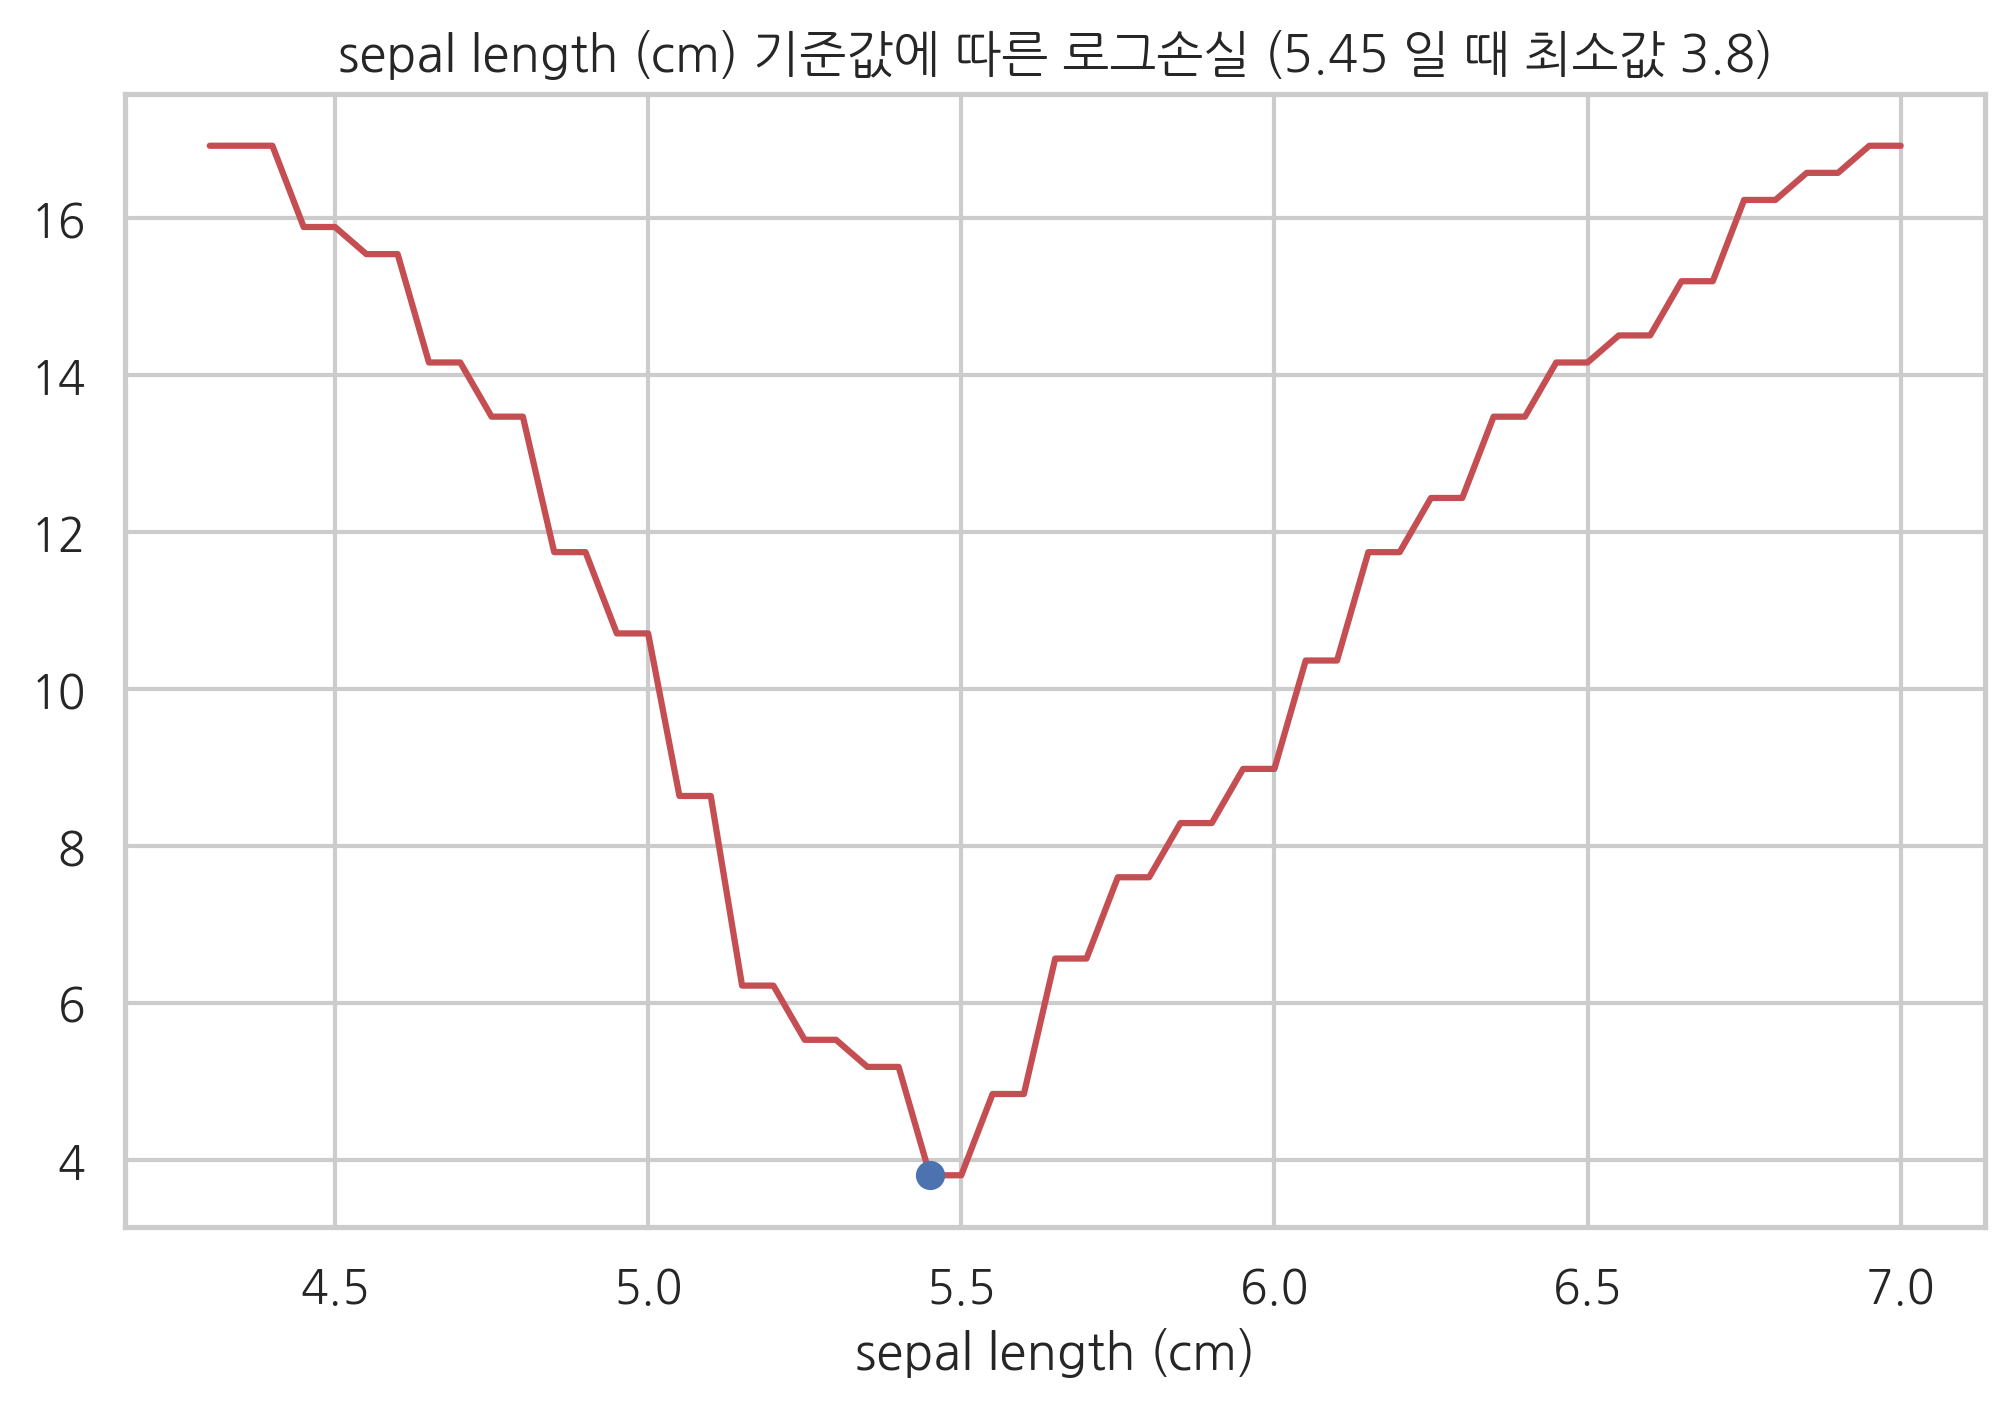

In [4]:
from sklearn.datasets import load_iris

iris = load_iris()
idx = np.in1d(iris.target, [0, 1])
X = iris.data[idx, :]
y = iris.target[idx]
df = pd.DataFrame(X, columns=iris.feature_names)
df["y"] = iris.target[idx]

def calc_logloss(col, threshold, reverse=False):
    if reverse:
        df["y_hat"] = (df[col] < threshold).astype(int)
    else:
        df["y_hat"] = (df[col] > threshold).astype(int)
    return log_loss(df['y'], df['y_hat'])

def plot_min_logloss(col, reverse=False):
    th_min = df[col].min()
    th_max = df[col].max()
    th_range = np.arange(th_min, th_max + 0.05, 0.05)
    
    loglosses = []
    for th in th_range:
        loglosses.append(calc_logloss(col, th, reverse))
        
    id_min = np.argmin(loglosses)
    th_min = th_range[id_min]
    ll_min = np.min(loglosses)
    plt.plot(th_range, loglosses, 'r-')
    plt.plot(th_min, ll_min, 'bo')
    title = '{} 기준값에 따른 로그손실 ({:.3} 일 때 최소값 {:.3})'.format(col, th_min, ll_min)
    
    plt.title(title)
    plt.xlabel(col)
    plt.show()
    
plot_min_logloss('sepal length (cm)')

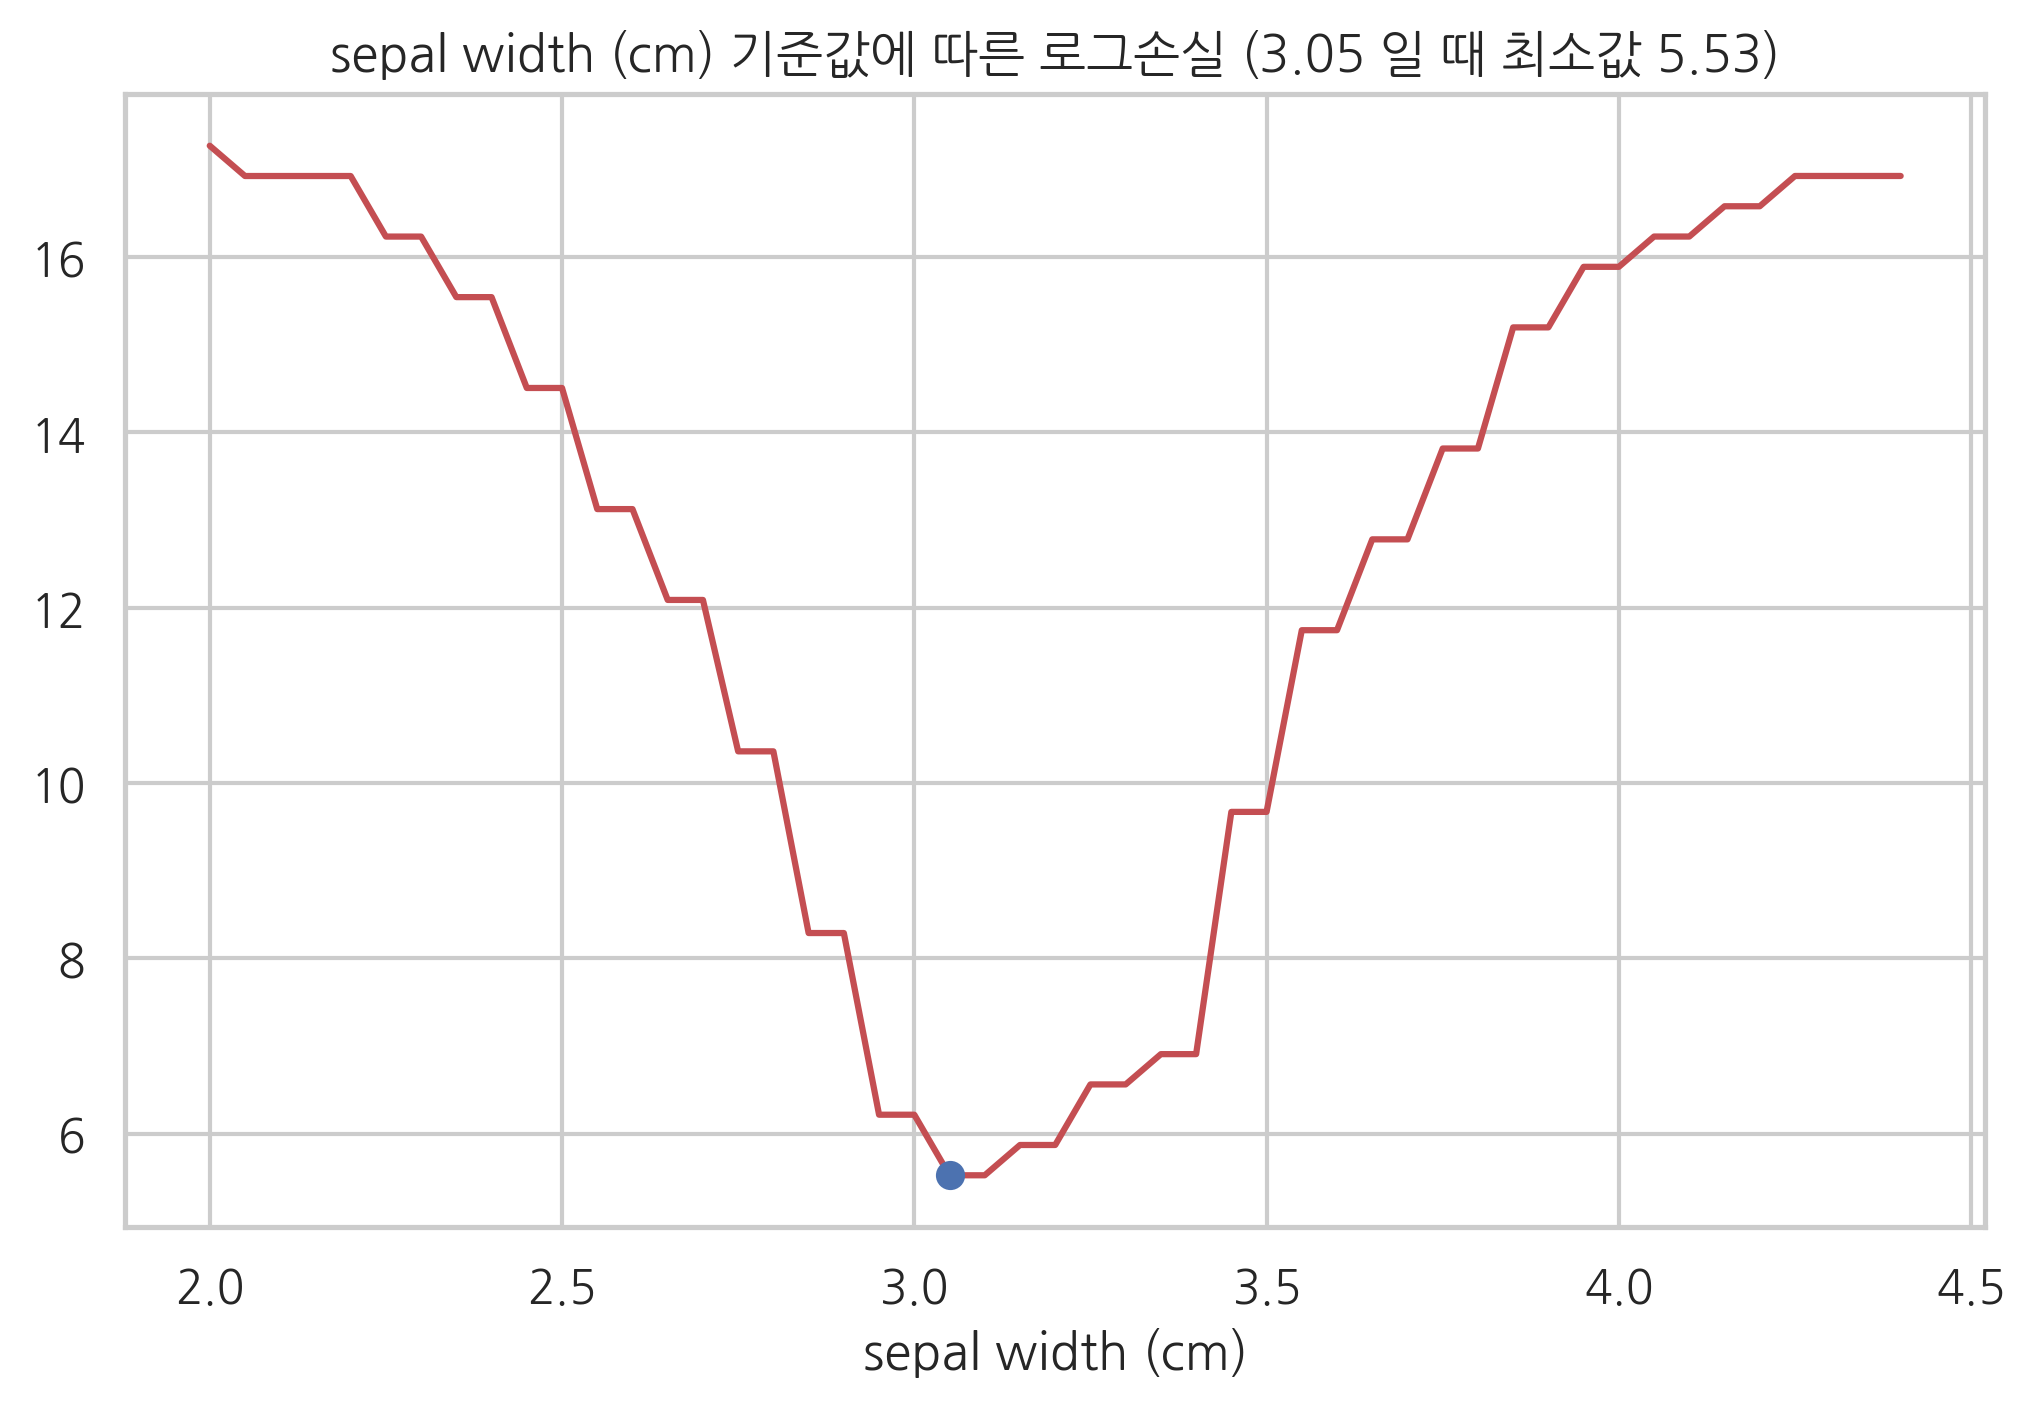

In [5]:
plot_min_logloss('sepal width (cm)', reverse=True)

In [6]:
N = 200
p = [1/2, 1/4, 1/8, 1/8]
doc0 = list("".join([int(N * p[i]) * c for i, c in enumerate("ABCD")]))
np.random.shuffle(doc0)
doc = "".join(doc0)
doc

'AADDDCAABAADDBBBAAAABABBAAABCBAABAACBBCACBBBACAACAABAAADADAAABAAAACCDAABCAAAAACBCDAABABAACCABACBBCABAACAAABBDBBBAACACAABDADABABAAABBDBAADADABDBABADBAAACACAAAADDADBDDBAACBBBACDDCCABAAAAAABBAAABADAAAABA'

In [7]:
from collections import Counter

p = np.array(list(Counter(doc).values())) / len(doc)
p

array([0.5  , 0.125, 0.125, 0.25 ])

In [8]:
sp.stats.entropy([1/2, 1/4, 1/8, 1/8], base=2)

1.75

In [9]:
vl_encoder = {"A": "0", "B": "10", "C": "110", "D": "111"}
vl_encoded_doc = "".join([vl_encoder[c] for c in doc])
len(vl_encoded_doc) / len(doc)

1.75

In [10]:
encoder = {"A": "00", "B": "01", "C": "10", "D": "11"}
encoded_doc = "".join([encoder[c] for c in doc])
len(encoded_doc) / len(doc)

2.0

In [11]:
sp.stats.entropy([1/2, 1/4, 1/8, 1/8], [1/4, 1/4, 1/4, 1/4], base=2)

0.24999999999999997

In [12]:
sp.stats.entropy([1/2, 1/4, 1/8, 1/16, 1/64, 1/64, 1/64, 1/64], [1/8, 1/8, 1/8, 1/8, 1/8, 1/8, 1/8, 1/8], base=2)

1.0